# Introduction to Statistical Learning 
Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani is considered a canonical text in the field of statistical/machine learning and is an absolutely fantastic way to move forward in your analytics career. [The text is free to download](http://www-bcf.usc.edu/~gareth/ISL/) and an [online course by the authors themselves](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about) is currently available in self-pace mode, meaning you can complete it any time. Make sure to **[REGISTER FOR THE STANDFORD COURSE!](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about)** The videos have also been [archived here on youtube](http://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/).

In [1]:
!ls data

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Chapter 6 Linear Model Selection and Regularization
Linear models still can do astonishingly well compared to non-linear models. This chapter will explore other types of fitting besides least squares because they can give better prediction accuracy and interpretability.

## Classes of alternatives to least squares
* Subset Selection - Choose a subset of the predictors
* Shrinkage (regularization) - Fit all predictors but limit their size. Coefficients can go to 0.
* Dimension Reduction - project the predictors into a smaller subspace

## Best Subset Selection
Fit all possible models $2^p$ and take the one with highest adjusted $R^2$ through cross validation. This can be impossible with large enough p

## Stepwise Selection - Forward, Backward and both
Because of computational limitation a simpler method of adding or subtracting the best predictor to the current model is employed.

### Forward Selection
Start with an empty model and choose on predictor to add to the model based on best adjusted $R^2$ or other similar metric. Continue adding variables until no improvement in adjusted $R^2$. 

A variation to this is to retain each model at each step and use $R^2$ (not adjusted) as the metric. This will build p models. Then use cross validation with $R^2$ to pick the best model of those p models built from forward selection.

### Backward Selection
Similar to forward selection but start with all predictors in model and remove one at a time until adjusted $R^2$ is maximized or alternatively, find p models with $R^2$ and then use cross validation to pick best of the p models.

## Both
At each step, consider both adding or subtracting a variable in the model.

# Choosing Optimal Model 
## Adjusting Training Statistics or Using Cross Validation
As learned in Chapter 5, cross validation is an extremely good tool at giving us insight to how well the model will be used on unseen data (test data).

But alternatively to cross validation, we can punish the training error statistics so in theory they can give us insight on what the test error will be. There have been several statistics developed to give us insight as to what the model will do for unseen errors.

The 4 most popular are AIC, BIC, Mallows Cp and Adjusted R^2. AIC, BIC and Cp all have similar formulas that inflate the error for more predictors and a higher estimated variance. Adjusted R squared lowers the R^2 by each additional predictor in the model. All 4 of these statistics are 'classical' model selectors and were used (I believe) before cross validation and so relied on just fitting the data one time on ALL the data. 

Cross validation can be computationally intense but with modern computation we can build lots of models and evaluate them easily.

## Shrinkage Methods
Ridge and Lasso regression are most common.
### Ridge Regression
Minimizes not only the squared error (RSS) but sum of predictors squared times a constant $\lambda$. When $\lambda$ is 0 then ridge equals least squares. when $\lambda$ heads to infinity, all predictors head to 0.

Since ridge regression works directly with the size of the parameter coefficients, you must scale all predictors by dividing by their standard deviation.
### The Lasso
Uses L1 penalty instead of L2 (absolute value of predictors vs squared value). The lasso performs variable selection by setting some predictors to exactly 0 (and thus automatic variable selection), unlike ridge which will never completely do eliminate variables. 

### Alternative logic of lasso and ridge regression
Instead of thinking of penalizing the error by either the L1 or L2 norm. We can think of setting up lasso/ridge regression as minimizing the squared errors subject to keeping the parameters less than a certain value. Think of this value as a 'budget' of allowable spending to occur. You can allow yourself to spend your parameters in any way you chose as long as you don't go over the total budget.

Lasso yields predictors equivalent to 0 because of sharp corners

![ridge and lasso](images/ridge.png)

### Which is better Lasso or Ridge
No way to tell beforehand but in general, settings where there are many import predictor variables that related to the response ridge will perform better. When there are only a few variables that relate to the response, lasso will do better.

But... as always cross validation can be used

### Choosing $\lambda$
Choose $\lambda$ through cross validation. Search an array of $\lambda$'s through cross validation and choose the $\lambda$ which minimizes MSE. Then build your model with that $\lambda$ on all the data.

# Dimension Reduction Techniques
Instead of using the original predictors, we transform them first and then fit our models. Usually transform variables so that there are less in number than the original set. Two approaches in book - principal components and partial least squares

# Principal Component Analysis (PCA)
The first principal component is the direction where observations vary the most. We want to capture as much information as we can in one single direction. Which single direction captures as much information as possible? The direction where the variance is highest amongst the projected points.

The first principal component also minimizes the sum of squared perpendicular distances between point and line. Each transformed first principal component can be thought as single number summaries of all that particular observation.

The second principal component must be uncorrelated to the first which makes it orthogonal (90 degrees in two dimensions) to the first. The second PC will capture less information (less spread). Plotting each PC against each variable can show how much information is captured by each one.


## Principal Component Regression
First find first M principal components where M < p then fit with least squares. Choose M with cross validation. Usually, data is standardized by standard deviation first.

## Partial Least Squares
The response does not determine the principal components. This means PCA is used in an unsupervised way. PLS is a supervised alternative to PCR. PLS generates new features as a linear combination of the old features and the response

Computed by doing simple linear regression of Y onto each predictor and setting that coefficient to the linear combination coefficient for transformed variable Z1. So weights are higher for those variables with stronger relationships to response. Z2 is computed by regressing all variables against the residuals of Z1 being fit to the model. Do this iteratively (fit remaining residuals) to come up with M PLS components. Then do least squares fit on all M new dimensions. In practice PLS does not do better than PCR or ridge regression.

# High Dimensional Data
When speaking of high dimensional data, we generally mean data with many predictors, especially when p approaches or exceeds n. Generally it is better to have more predictors but if many of the predictors are not associated with the response then they can cause the actual signal to get diluted - a double edged sword these predictors.

# Exercises
## 1
a) best subset  
b) unknown  
c) i) true  
ii) false   
iii) false 
iv) false  
v) false  

## 2
a) iii  
b) iii  
c) ii  

## 3
a) iv steadily decrease to 0 (not to zero)  
b) ii decrease then increase  
c) iii steadily increase  
d) iv steadily decrease  
e) v constant  

## 4
a) iii steadily increase    
b) ii decrease then increase  
c) iv steadily decrease  
d) iii steadily increase  
e) v constant  

## 5
To simplify things lets assume that $x_{11}$ = 1, which makes $x_{12}$ = 1 and $x_{21}$ and $x_{22}$ = -1

So, we have two points (1, 1, 0) and (-1, -1, 0)

$Ridge = (0 - (\beta_1 + \beta_2))^2 + (0 - (-\beta_1 - \beta_2))^2 + \lambda(\beta_1^2 + \beta_2^2)$ 

$Ridge = 2\beta_1^2 + 4\beta_1\beta_2 +  2\beta_2^2 + \lambda(\beta_1^2 + \beta_2^2)$  

Take derivative with respect to $\beta_1$

$0 = 4\beta_1 + 4\beta_2 + 2\lambda\beta_1$ 

Taking the derivate with respect to $\beta_2$  
$0 = 4\beta_2 + 4\beta_1 + 2\lambda\beta_2$  

Setting them equal to each other we get that $\beta_1 = \beta_2$

#### Now for lasso
This answer below is likely wrong from what I've seen online but here is my solution regardless  
$lasso = 2\beta_1^2 + 4\beta_1\beta_2 +  2\beta_2^2 + \lambda(|\beta_1| + |\beta_2|)$

Take derivative with respect to $\beta_1$

For $\beta_1$ greater than 0  
$0 = 4\beta_1 + 4\beta_2 + \lambda$

For $\beta_1$ less than 0  
$0 = 4\beta_1 + 4\beta_2 -\lambda$

Since this is symmetrical, the derivative will be the same for $\beta_2$. We can form 2 combinations of equations to set equal to each other. 

The case when the $\beta's$ have the same sign and when the don't. When they have the same sign, everything will cancel and we are left with 0 = 0 usually meaning an infinite number of solutions but since $\lambda$ must be >=0 this is impossible.

If we look at the case when the $\beta's$ have a different sign then we see that this can happen only when $\lambda = 0$ and then $\beta_1 = -\beta_2$


## 6a
$(y_1 - \beta_1)^2 + \lambda\beta_1^2$

Problem allows me to choose $y_1$ and $\lambda$. I'll choose $y_1 = 5$ and $\lambda = 3$

In [2]:
# plot this as a function of beta
#(5 - beta)^2 + 3beta^2
import numpy as np
beta = np.linspace(-10, 10, 1000)
y = 5
lam = 3
ridge = (y - beta)**2 + lam * beta**2

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

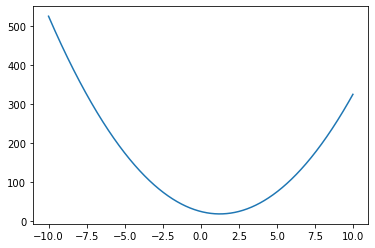

In [4]:
plt.plot(beta, ridge)

In [5]:
# min from plot
beta[np.argmin(ridge)]

1.2512512512512508

In [6]:
# min from 6.14
y / (1 + lam) # confirmed!

1.25

# 6b
do similar thing for lasso

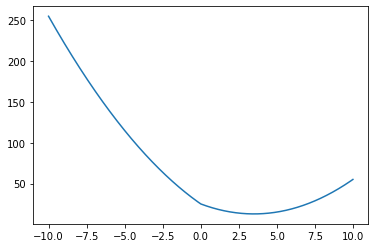

In [7]:
beta = np.linspace(-10, 10, 1000)
y = 5
lam = 3
lasso = (y - beta)**2 + lam * abs(beta)
plt.plot(beta, lasso)

In [8]:
beta[np.argmin(lasso)]

3.493493493493494

In [9]:
# min from 6.15
# since y > lambda / 2 minimum should be at y - lambda / 2
y - lam / 2 # confirmed!

3.5

# 7
nope

# 8

In [10]:
x = np.random.randn(100)
err = np.random.randn(100)

In [11]:
beta0, beta1, beta2, beta3 = -5, 1, 4, 3
y = beta0 + beta1 * x + beta2 * x ** 2 + beta3 * x ** 3 + err

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from itertools import combinations

In [13]:
from collections import OrderedDict

In [14]:
OrderedDict({'b': 1, 'a':534})

OrderedDict([('b', 1), ('a', 534)])

In [15]:
df = pd.DataFrame({'x1': x, 'x2': x ** 2, 'x3': x**3, 'x4': x**4,'x5': x**5,
                   'x6': x**6,'x7': x**7,'x8': x**8,'x9': x**9,'x10': x**10,
                   'y':y})

In [16]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.162013,0.026248,-0.004253,0.000689,-1.116216e-04,1.808414e-05,-2.929865e-06,4.746760e-07,-7.690364e-08,1.245938e-08,-5.940113
1,0.439458,0.193123,0.084870,0.037297,1.639033e-02,7.202863e-03,3.165357e-03,1.391042e-03,6.113047e-04,2.686428e-04,-3.844704
2,-0.052779,0.002786,-0.000147,0.000008,-4.095491e-07,2.161559e-08,-1.140850e-09,6.021290e-11,-3.177977e-12,1.677305e-13,-5.681904
3,2.114899,4.472800,9.459522,20.005937,4.231054e+01,8.948255e+01,1.892466e+02,4.002375e+02,8.464621e+02,1.790182e+03,42.824499
4,-0.795095,0.632176,-0.502640,0.399647,-3.177574e-01,2.526474e-01,-2.008787e-01,1.597177e-01,-1.269908e-01,1.009698e-01,-7.110126


In [17]:
lr = LinearRegression()

In [18]:
X = df.iloc[:, :-1]
y = df['y']

In [19]:
lr.fit(X, y)

LinearRegression()

In [20]:
sigma2 = np.sum((lr.predict(X) - y) ** 2) / len(X)

In [21]:
# best subset selection
n = len(X)
cp = []
bic = []
adj_r2 = []
for i in range(1, 11):
    current_cp = []
    current_bic = []
    current_adj_r2 = []
    for comb in combinations(range(10), i):
        X = df.iloc[:, list(comb)]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        tss = np.sum((y - y.mean()) ** 2)
        d = len(comb)
        current_cp.append(1/n * (rss + 2 * d * sigma2))
        current_bic.append(1/n * (rss + np.log(n) * d * sigma2))
        current_adj_r2.append(1 - rss / (n - d - 1) * (n - 1) / tss)
        
    cp.append(min(current_cp))
    bic.append(min(current_bic))
    adj_r2.append(max(current_adj_r2))

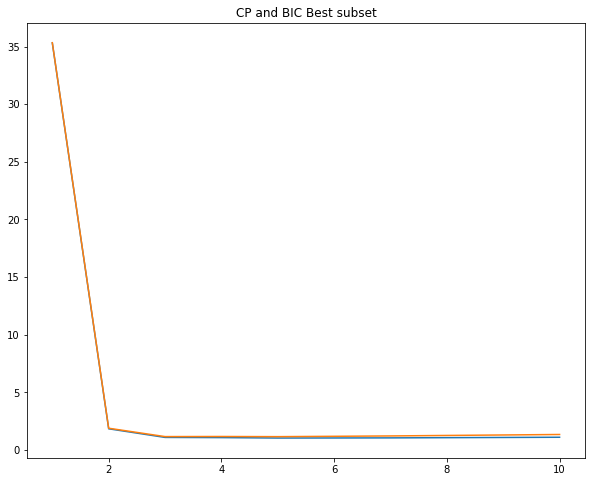

In [22]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), cp)
plt.plot(range(1, 11), bic)
plt.title("CP and BIC Best subset");

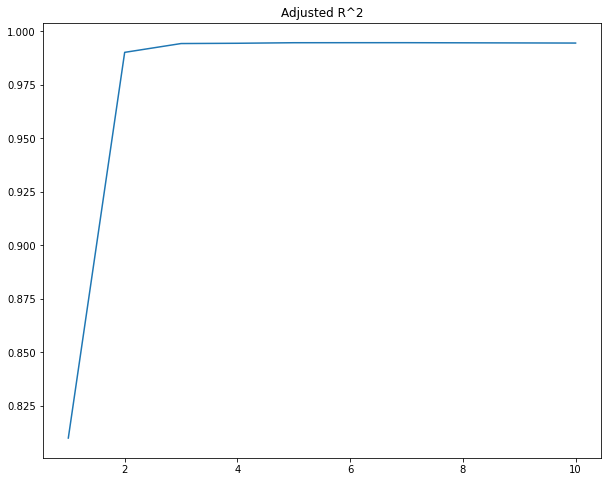

In [23]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), adj_r2)
plt.title("Adjusted R^2");

In [24]:
# all three agree on correct model! Not for me
np.argmin(cp), np.argmin(bic), np.argmax(adj_r2)

(4, 4, 6)

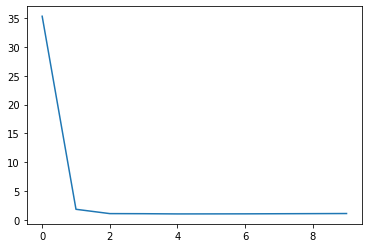

In [25]:
plt.plot(cp)

In [26]:
cp

[35.31115960611486,
 1.8401256025821702,
 1.0909878442031342,
 1.0754154634310706,
 1.037885160550381,
 1.0435213719182728,
 1.051381656670727,
 1.0695974495273677,
 1.0872920687012724,
 1.105685230310438]

In [27]:
# forward selection. Looks at Cp each step and stops if it can't beat old best
current_vars = []
best_cp = 10000000
prev_cp = best_cp
best_cp = 1000000
while best_cp < prev_cp:
    prev_cp = best_cp
    old_vars = current_vars.copy()
    for i in range(10):
        if i in current_vars:
            continue
        X = df.iloc[:, old_vars + [i]]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        d = len(old_vars) + 1
        cur_cp = 1/n * (rss + 2 * d * sigma2)
        if cur_cp < best_cp:
            current_vars = old_vars + [i]
            best_cp = cur_cp

In [28]:
current_vars

[2, 1, 0, 3, 5]

In [29]:
best_cp

1.037885160550381

In [30]:
old_vars

[2, 1, 0, 3, 5]

In [31]:
# backward selection. Looks at Cp each step and stops if it can't beat old best
current_vars = list(range(10))
best_cp = 10000000
prev_cp = best_cp
best_cp = 1000000
while best_cp < prev_cp:
    prev_cp = best_cp
    old_vars = current_vars.copy()
    for i in range(10):
        if i not in current_vars:
            continue
        old_vars2 = old_vars.copy()
        old_vars2.remove(i)
        X = df.iloc[:, old_vars2]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        d = len(old_vars) + 1
        cur_cp = 1/n * (rss + 2 * d * sigma2)
        if cur_cp < best_cp:
            current_vars = old_vars2.copy()
            best_cp = cur_cp

In [32]:
current_vars # same answer for backward selection

[0, 1, 2, 3, 9]

In [33]:
X = df.iloc[:, :-1]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [35]:
X_stand = X / X.std()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y)

In [37]:
alphas = np.linspace(.0001, .1, 1000)
errors = []
for alpha in alphas:
    ls = Lasso(alpha, max_iter=100000, tol=.0001)
    ls.fit(X_train, y_train)
    errors.append(np.mean((ls.predict(X_test) - y_test) ** 2))

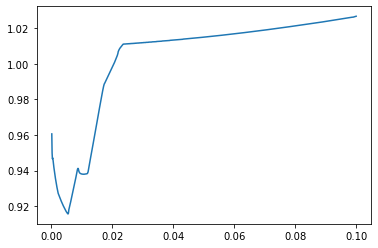

In [38]:
plt.plot(alphas, errors)

In [39]:
np.argmin(errors)

53

In [40]:
alphas[np.argmin(errors)]

0.0054

In [41]:
ls = Lasso(alpha=.0054, max_iter=100000, tol=.0001)
ls.fit(X_stand, y)

Lasso(alpha=0.0054, max_iter=100000)

In [42]:
ls.intercept_, ls.coef_

(-5.382185409510796,
 array([ 1.74686416,  6.83162707, 10.46153428, -1.64732298,  0.33845943,
        -0.        ,  0.        ,  0.        , -0.32803004,  0.68527383]))

In [43]:
# beta 3 was very far off
beta0, beta1, beta2, beta3

(-5, 1, 4, 3)

In [44]:
beta0_7 = 3
beta7 = -1

In [45]:
y_7 = beta0_7 + beta7 * x ** 7 + err

In [50]:
df_7 = pd.DataFrame({'x1': x, 'x2': x ** 2, 'x3': x**3, 'x4': x**4,'x5': x**5,
                   'x6': x**6,'x7': x**7,'x8': x**8,'x9': x**9,'x10': x**10,
                   'y':y_7})

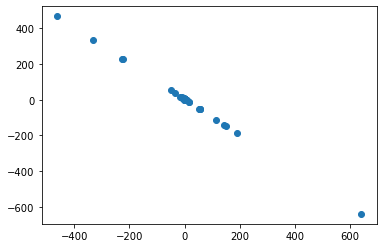

In [51]:
plt.scatter(X['x7'], y_7)

In [52]:
# best subset selection
X = df_7.iloc[:, :-1]
n = len(X)
tss = np.sum((y_7 - y_7.mean()) ** 2)
lr.fit(X,  y_7)
sigma2 = np.sum((lr.predict(X) - y_7) ** 2) / len(X)
cp = []
bic = []
adj_r2 = []
for i in range(1, 11):
    current_cp = []
    current_bic = []
    current_adj_r2 = []
    for comb in combinations(range(10), i):
        X = df_7.iloc[:, list(comb)]
        lr.fit(X, y_7)
        rss = np.sum((lr.predict(X) - y_7) ** 2)
        
        d = len(comb)
        current_cp.append(1/n * (rss + 2 * d * sigma2))
        current_bic.append(1/n * (rss + np.log(n) * d * sigma2))
        current_adj_r2.append(1 - rss / (n - d - 1) * (n - 1) / tss)
        
    cp.append(min(current_cp))
    bic.append(min(current_bic))
    adj_r2.append(max(current_adj_r2))

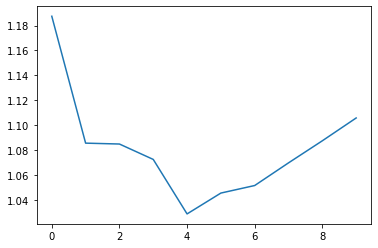

In [53]:
# best model is with one predictor
plt.plot(range(10), cp)
bic.append(min(current_bic))

In [54]:
# lasso
X = df_7.iloc[:, :-1]
X_stand = X / X.std()
X_train, X_test, y_train, y_test = train_test_split(X_stand, y_7)

In [55]:
alphas = np.linspace(.001, 50, 100)
errors = []
ls = Lasso(alpha, max_iter=1000000000, tol=.000001)

for alpha in alphas:
    ls = Lasso(alpha=alpha)
    ls.fit(X_train, y_train)
    errors.append(np.mean((ls.predict(X_test) - y_test) ** 2))

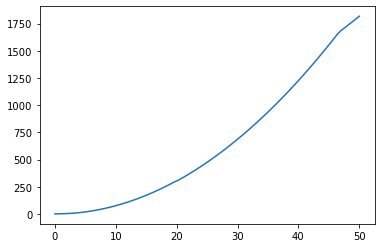

In [56]:
plt.plot(alphas, errors)

In [57]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

0.001

In [58]:
ls = Lasso(alpha=best_alpha, max_iter=100000, tol=.000001)
ls.fit(X_stand, y_7)

Lasso(alpha=0.001, max_iter=100000, tol=1e-06)

In [59]:
# coefficient doesn't resemble model at all. but these have been scaled by
# their  std.  must divide by std
ls.coef_

array([  0.83175276,   1.32280723,  -1.12896681,  -2.29898947,
        -0.        ,  -0.        , -94.94616012,   0.        ,
        -2.5252067 ,   1.09641555])

In [60]:
# that's better - very close to actual value of -1
ls.coef_ / X.std()

x1     0.802183
x2     0.902292
x3    -0.305697
x4    -0.313636
x5    -0.000000
x6    -0.000000
x7    -0.970903
x8     0.000000
x9    -0.004528
x10    0.000837
dtype: float64

In [61]:
# also look at intercept
ls.intercept_

2.5545525523245516

# 9

In [62]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [63]:
college = pd.read_csv('data/college.csv')

In [64]:
college['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [65]:
college['private_yes'] = (college['Private'] == 'Yes') * 1

In [66]:
X = college.iloc[:, 3:]

In [67]:
y = college['Apps']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
# Error
np.mean((lr.predict(X_test) - y_test) ** 2)

2175648.575518452

In [71]:
from sklearn.linear_model import RidgeCV

In [72]:
X_std = X.iloc[:, :-1].std()

In [73]:
X_std['private_yes'] = 1

In [74]:
X_std

Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
private_yes       1.000000
dtype: float64

In [75]:
rcv = RidgeCV(alphas=np.linspace(.01, 100, 1000), cv=10)
rcv.fit(X / X_std, y)

RidgeCV(alphas=array([1.00000000e-02, 1.10090090e-01, 2.10180180e-01, 3.10270270e-01,
       4.10360360e-01, 5.10450450e-01, 6.10540541e-01, 7.10630631e-01,
       8.10720721e-01, 9.10810811e-01, 1.01090090e+00, 1.11099099e+00,
       1.21108108e+00, 1.31117117e+00, 1.41126126e+00, 1.51135135e+00,
       1.61144144e+00, 1.71153153e+00, 1.81162162e+00, 1.91171171e+00,
       2.01180180e+00, 2.11189189e+0...
       9.76979279e+01, 9.77980180e+01, 9.78981081e+01, 9.79981982e+01,
       9.80982883e+01, 9.81983784e+01, 9.82984685e+01, 9.83985586e+01,
       9.84986486e+01, 9.85987387e+01, 9.86988288e+01, 9.87989189e+01,
       9.88990090e+01, 9.89990991e+01, 9.90991892e+01, 9.91992793e+01,
       9.92993694e+01, 9.93994595e+01, 9.94995495e+01, 9.95996396e+01,
       9.96997297e+01, 9.97998198e+01, 9.98999099e+01, 1.00000000e+02]),
        cv=10)